In [3]:
# --- TradingSystemPro インポートテスト ---
import sys
import os

# プロジェクトのsrcディレクトリをパスに追加
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
src_path = os.path.join(project_root, 'src')
sys.path.insert(0, src_path)

print(f"Current directory: {current_dir}")
print(f"Project root: {project_root}")
print(f"Src path: {src_path}")
print(f"Src path exists: {os.path.exists(src_path)}")

# 必要なライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# configモジュールのテスト
try:
    import config
    print("✅ config モジュールのインポート成功")
    
    # configの内容を確認
    config_attrs = [attr for attr in dir(config) if not attr.startswith('_')]
    print(f"Config attributes: {config_attrs}")
    
    if hasattr(config, 'CONFIG'):
        print("✅ CONFIG found!")
        print(f"CONFIG keys: {list(config.CONFIG.keys())}")
        print(f"Default symbol: {config.CONFIG['DEFAULT_SYMBOL']}")
    else:
        print("❌ CONFIG not found")
    
except Exception as e:
    print(f"❌ Config import error: {e}")

# TradingSystemのテスト
try:
    from trading_system import TradingSystem
    print("✅ TradingSystem import successful")
except Exception as e:
    print(f"❌ TradingSystem import error: {e}")

# 拡張機能のテスト
try:
    from extensions import AdvancedPatternDetector, PerformanceAnalyzer, RiskManager
    print("✅ Extensions import successful")
except Exception as e:
    print(f"❌ Extensions import error: {e}")

print("\n🎉 インポートテスト完了！")

Current directory: d:\MyWorkspace\PythonProjects\TradingSystemPro\notebooks
Project root: d:\MyWorkspace\PythonProjects\TradingSystemPro
Src path: d:\MyWorkspace\PythonProjects\TradingSystemPro\src
Src path exists: True
✅ config モジュールのインポート成功
Config attributes: ['CONFIG']
✅ CONFIG found!
CONFIG keys: ['DEFAULT_SYMBOL', 'DEFAULT_PERIOD', 'DATA_PERIOD_DAYS', 'INITIAL_CASH', 'INVESTMENT_RATIO', 'FEE_RATE', 'SLIPPAGE_RATE', 'TAKE_PROFIT_ATR_MULTIPLE', 'STOP_LOSS_ATR_MULTIPLE', 'TAKE_PROFIT_RATE', 'STOP_LOSS_RATE', 'BUY_THRESHOLD', 'SELL_THRESHOLD', 'SIGNAL_WEIGHTS']
Default symbol: 7203.JP
✅ TradingSystem import successful
✅ Extensions import successful

🎉 インポートテスト完了！
✅ TradingSystem import successful
✅ Extensions import successful

🎉 インポートテスト完了！


In [4]:
# --- TradingSystem デモンストレーション ---

print("=== TradingSystemの初期化 ===")

# 1. TradingSystemのインスタンス作成（米国株を使用）
trading_system = TradingSystem("AAPL")  # Apple Inc.
print(f"銘柄コード: {trading_system.stock_code}")
print(f"初期資金: ${trading_system.initial_cash:,.2f}")
print(f"投資比率: {trading_system.investment_ratio:.1%}")
print(f"手数料率: {trading_system.fee_rate:.1%}")

# 2. データ準備
print("\n=== データ準備 ===")
try:
    trading_system.prepare_data()
    print("✅ データ準備完了")
    
    # データの確認
    if trading_system.df is not None:
        print(f"データ期間: {trading_system.df.index[0].date()} - {trading_system.df.index[-1].date()}")
        print(f"データ件数: {len(trading_system.df)}件")
        
        print("\n最新5日間のデータ:")
        display(trading_system.df[['Open', 'High', 'Low', 'Close', 'Volume']].tail())
        
        # テクニカル指標の確認
        print("\n計算されたテクニカル指標:")
        technical_cols = [col for col in trading_system.df.columns if col not in ['Open', 'High', 'Low', 'Close', 'Volume']]
        for col in technical_cols[:10]:  # 最初の10個を表示
            print(f"  - {col}")
        if len(technical_cols) > 10:
            print(f"  ... 他{len(technical_cols)-10}個")
    else:
        print("❌ データの準備に失敗しました")
        
except Exception as e:
    print(f"❌ エラー: {e}")
    import traceback
    traceback.print_exc()

=== TradingSystemの初期化 ===
銘柄コード: AAPL
初期資金: $1,000,000.00
投資比率: 50.0%
手数料率: 0.5%

=== データ準備 ===
Loading data for AAPL...
✅ データ準備完了
データ期間: 2024-04-25 - 2025-07-08
データ件数: 300件

最新5日間のデータ:
✅ データ準備完了
データ期間: 2024-04-25 - 2025-07-08
データ件数: 300件

最新5日間のデータ:


,Open,High,Low,Close,Volume
Date,,,,,
2025-07-01,206.665,210.1865,206.1401,207.82,78788867
2025-07-02,208.910,213.3400,208.1400,212.44,67941811
2025-07-03,212.145,214.6500,211.8101,213.55,34955836
2025-07-07,212.680,216.2300,208.8000,209.95,50228984
2025-07-08,210.100,211.4300,208.4600,210.01,42778091



計算されたテクニカル指標:
  - sma5
  - sma25
  - sma75
  - RSI
  - MACD
  - MACD_signal
  - MACD_hist
  - BB_upper
  - BB_middle
  - BB_lower
  ... 他1個


In [8]:
# --- シグナル生成とバックテスト ---

# モジュールのリロード
import importlib
import sys
import os

# パスを再設定
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# モジュールのリロード
import trading_system
importlib.reload(trading_system)
from trading_system import TradingSystem

print("=== TradingSystemの再初期化 ===")
# TradingSystemを再作成
trading_system = TradingSystem("AAPL")
trading_system.prepare_data()
print("✅ データ準備完了")

print("\n=== シグナル生成 ===")

# 1. シグナル生成
try:
    if hasattr(trading_system, 'generate_signals'):
        print("シグナル生成を開始...")
        trading_system.generate_signals()
        print("✅ シグナル生成完了")
        
        # 生成されたシグナルの確認
        if 'buy_signal' in trading_system.df.columns:
            buy_signals_count = trading_system.df['buy_signal'].sum()
            sell_signals_count = trading_system.df['sell_signal'].sum()
            print(f"総買いシグナル数: {buy_signals_count}")
            print(f"総売りシグナル数: {sell_signals_count}")
            
            # 直近10日のシグナルを表示
            print("\n直近10日のシグナル:")
            recent_signals = trading_system.df[['Close', 'buy_signal', 'sell_signal', 'signal_strength']].tail(10)
            display(recent_signals)
        else:
            print("❌ シグナル生成に失敗しました")
    else:
        print("❌ generate_signalsメソッドが見つかりません")
        print(f"利用可能なメソッド: {[m for m in dir(trading_system) if not m.startswith('_')]}")
        
except Exception as e:
    print(f"❌ シグナル生成エラー: {e}")
    import traceback
    traceback.print_exc()

print("\n=== バックテスト実行 ===")

# 2. バックテスト実行
try:
    if hasattr(trading_system, 'backtest'):
        print("バックテストを開始...")
        trading_system.backtest()
        print("✅ バックテスト完了")
        
        # 結果の表示
        print(f"最終資産: ${trading_system.final_cash:,.2f}")
        print(f"初期資金: ${trading_system.initial_cash:,.2f}")
        
        if trading_system.final_cash > 0:
            total_return = (trading_system.final_cash - trading_system.initial_cash) / trading_system.initial_cash * 100
            print(f"総リターン: {total_return:+.2f}%")
            
            # 年率換算リターン（概算）
            days_traded = len(trading_system.df)
            if days_traded > 0:
                annual_return = ((trading_system.final_cash / trading_system.initial_cash) ** (252/days_traded) - 1) * 100
                print(f"年率換算リターン: {annual_return:+.2f}%")
        
        print(f"取引履歴件数: {len(trading_system.trade_history)}件")
        
        if trading_system.trade_history:
            print("\n最新の取引（最大5件）:")
            for i, trade in enumerate(trading_system.trade_history[-5:]):
                print(f"  {i+1}. {trade}")
        
        print(f"資産履歴データ点数: {len(trading_system.asset_history)}点")
    else:
        print("❌ backtest メソッドが見つかりません")
        # 代わりにrun_simulationを使用
        if hasattr(trading_system, 'run_simulation'):
            print("run_simulationメソッドを使用します...")
            asset_history, trade_history, final_cash = trading_system.run_simulation()
            print(f"シミュレーション完了: 最終資産 ${final_cash:,.2f}")
    
except Exception as e:
    print(f"❌ バックテストエラー: {e}")
    import traceback
    traceback.print_exc()

=== TradingSystemの再初期化 ===
Loading data for AAPL...
✅ データ準備完了

=== シグナル生成 ===
シグナル生成を開始...
✅ シグナル生成完了
総買いシグナル数: 69
総売りシグナル数: 37

直近10日のシグナル:


,Close,buy_signal,sell_signal,signal_strength
Date,,,,
2025-06-24,200.30,1,0,2.5
2025-06-25,201.56,0,0,0.0
2025-06-26,201.00,0,0,1.5
2025-06-27,201.08,0,0,0.0
2025-06-30,205.17,0,0,0.0
2025-07-01,207.82,0,0,-1.0
2025-07-02,212.44,0,1,-2.2
2025-07-03,213.55,0,1,-2.2
2025-07-07,209.95,0,0,-1.2



=== バックテスト実行 ===
バックテストを開始...
Running simulation...
✅ バックテスト完了
最終資産: $889,505.75
初期資金: $1,000,000.00
総リターン: -11.05%
年率換算リターン: -9.37%
取引履歴件数: 40件

最新の取引（最大5件）:
  1. {'type': 'SELL', 'date': Timestamp('2025-06-12 00:00:00'), 'price': np.float64(199.1004), 'qty': 2190, 'reason': 'Signal (score: 3.8)'}
  2. {'type': 'BUY', 'date': Timestamp('2025-06-20 00:00:00'), 'price': np.float64(201.10049999999998), 'qty': 2157, 'signal_score': 2.5}
  3. {'type': 'SELL', 'date': Timestamp('2025-06-23 00:00:00'), 'price': np.float64(201.39925000000002), 'qty': 2157, 'reason': 'Signal (score: 2.5)'}
  4. {'type': 'BUY', 'date': Timestamp('2025-06-24 00:00:00'), 'price': np.float64(200.40015), 'qty': 2155, 'signal_score': 3.8}
  5. {'type': 'SELL', 'date': Timestamp('2025-07-02 00:00:00'), 'price': np.float64(212.33378000000002), 'qty': 2155, 'reason': 'Take Profit (ATR x3.0)'}
資産履歴データ点数: 225点


=== 可視化とパフォーマンス分析 ===


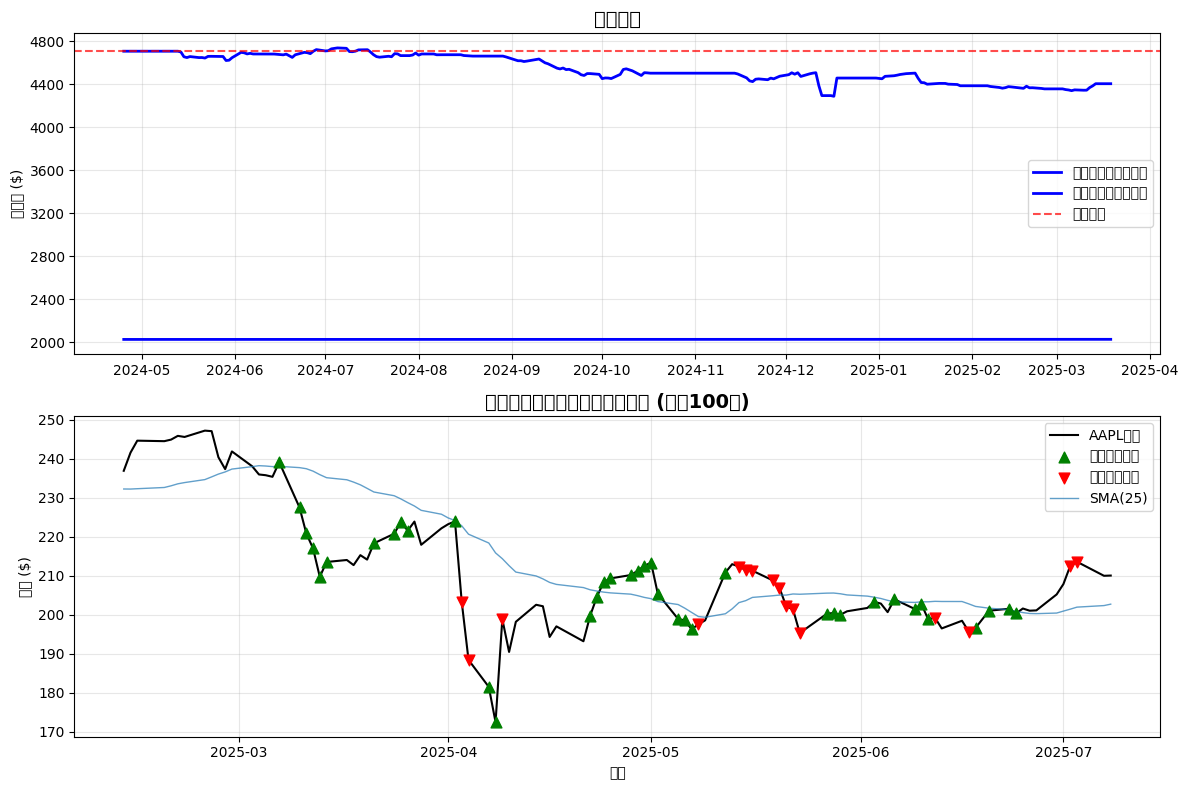


=== 拡張機能のデモ ===


TypeError: unsupported operand type(s) for -: 'tuple' and 'int'

In [9]:
# --- 可視化とパフォーマンス分析 ---

print("=== 可視化とパフォーマンス分析 ===")

# 1. 資産推移の可視化
plt.figure(figsize=(12, 8))

# 上部: 資産推移
plt.subplot(2, 1, 1)
if trading_system.asset_history:
    # asset_historyがタプルのリストの場合、適切に処理
    if isinstance(trading_system.asset_history[0], tuple):
        asset_values = [asset[1] for asset in trading_system.asset_history]  # (date, value)形式の場合
        dates = trading_system.df.index[:len(asset_values)]
    else:
        asset_values = trading_system.asset_history
        dates = trading_system.df.index[:len(asset_values)]
    
    plt.plot(dates, asset_values, linewidth=2, color='blue', label='ポートフォリオ価値')
    plt.axhline(y=trading_system.initial_cash, color='red', linestyle='--', alpha=0.7, label='初期資金')
    plt.title('資産推移', fontsize=14, fontweight='bold')
    plt.ylabel('資産額 ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)

# 下部: 株価とシグナル
plt.subplot(2, 1, 2)
recent_data = trading_system.df.tail(100)  # 最近100日のデータ
plt.plot(recent_data.index, recent_data['Close'], linewidth=1.5, label='AAPL終値', color='black')

# 買いシグナル
buy_signals = recent_data[recent_data['buy_signal'] == 1]
if not buy_signals.empty:
    plt.scatter(buy_signals.index, buy_signals['Close'], 
               color='green', marker='^', s=60, label='買いシグナル', zorder=5)

# 売りシグナル
sell_signals = recent_data[recent_data['sell_signal'] == 1]
if not sell_signals.empty:
    plt.scatter(sell_signals.index, sell_signals['Close'], 
               color='red', marker='v', s=60, label='売りシグナル', zorder=5)

# 移動平均線
if 'sma25' in recent_data.columns:
    plt.plot(recent_data.index, recent_data['sma25'], alpha=0.7, label='SMA(25)', linewidth=1)

plt.title('株価とトレーディングシグナル (直近100日)', fontsize=14, fontweight='bold')
plt.xlabel('日付')
plt.ylabel('価格 ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. 拡張機能のデモンストレーション
print("\n=== 拡張機能のデモ ===")

# パフォーマンス分析
performance_analyzer = PerformanceAnalyzer()

# asset_historyを適切な形式に変換
if trading_system.asset_history and isinstance(trading_system.asset_history[0], tuple):
    asset_values = [asset[1] for asset in trading_system.asset_history]
else:
    asset_values = trading_system.asset_history

performance_metrics = performance_analyzer.calculate_performance_metrics(
    asset_values, 
    trading_system.initial_cash
)

print("📊 パフォーマンス指標:")
for metric, value in performance_metrics.items():
    if isinstance(value, float):
        if 'return' in metric.lower() or 'ratio' in metric.lower():
            print(f"  {metric}: {value:.4f}")
        else:
            print(f"  {metric}: ${value:,.2f}")
    else:
        print(f"  {metric}: {value}")

# リスク管理
risk_manager = RiskManager()
current_price = trading_system.df['Close'].iloc[-1]
portfolio_value = trading_system.final_cash

if 'ATR' in trading_system.df.columns:
    atr_value = trading_system.df['ATR'].iloc[-1]
    stop_loss_distance = atr_value * trading_system.stop_loss_atr_multiple
    
    position_size = risk_manager.calculate_position_size(
        portfolio_value, current_price, stop_loss_distance
    )
    
    print(f"\n💰 リスク管理:")
    print(f"  現在価格: ${current_price:.2f}")
    print(f"  推奨ポジションサイズ: {position_size:.0f}株")
    print(f"  ATR: {atr_value:.2f}")

# 酒田五法パターン検出
pattern_detector = AdvancedPatternDetector()
recent_3days = trading_system.df.tail(3)
recent_5days = trading_system.df.tail(5)

print(f"\n🎯 酒田五法パターン検出:")
patterns = {
    "ダブルトップ": pattern_detector.detect_double_top(trading_system.df['Close']),
    "ダブルボトム": pattern_detector.detect_double_bottom(trading_system.df['Close']),
    "赤三兵": pattern_detector.detect_three_white_soldiers(recent_3days),
    "黒三兵": pattern_detector.detect_three_black_crows(recent_3days),
    "三空踏み上げ": pattern_detector.detect_three_gap_up(recent_5days),
    "三空叩き込み": pattern_detector.detect_three_gap_down(recent_5days)
}

for pattern_name, detected in patterns.items():
    status = "検出" if detected else "なし"
    emoji = "🔴" if detected else "⚪"
    print(f"  {emoji} {pattern_name}: {status}")

print("\n✅ 可視化・分析完了！")

# 🎯 パラメータ最適化（グリッドサーチ）

Trading System Proの強力な機能の一つであるパラメータ最適化を実演します。
複数のパラメータ組み合わせを自動的にテストし、最適な設定を見つけます。

## 📊 最適化の流れ
1. **パラメータ空間の定義** - 最適化したいパラメータの範囲を設定
2. **グリッドサーチ実行** - 全組み合わせでバックテストを実行
3. **結果分析** - 複数の評価指標で結果を比較
4. **最適パラメータ選択** - 目的に応じた最適設定を抽出
5. **可視化** - 結果をグラフで確認

In [ ]:
# パラメータ最適化のための追加インポート
import sys
import os

# srcディレクトリをパスに追加
src_path = os.path.join(os.path.dirname(os.getcwd()), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

# Jupyter環境でローカルモジュールをインストール（必要に応じて）
%pip install -e "{src_path}"

# モジュールのリロード（開発中の場合）
import importlib

# extensionsとtrading_systemのインポート
try:
    from extensions import Optimizer
    from trading_system import TradingSystem
except ModuleNotFoundError as e:
    importlib.invalidate_caches()
    %pip install -e "{src_path}"
    from extensions import Optimizer
    from trading_system import TradingSystem

import numpy as np

print("=== パラメータ最適化デモ開始 ===")
print(f"使用データ: {len(trading_system.df)}件 ({trading_system.df.index[0].date()} ~ {trading_system.df.index[-1].date()})")

# Optimizerインスタンス作成（TradingSystemクラスを渡す）
optimizer = Optimizer(TradingSystem, stock_code="AAPL")
print("Optimizerインスタンス作成完了")
print("=== パラメータ最適化デモ開始 ===")
print(f"使用データ: {len(trading_system.df)}件 ({trading_system.df.index[0].date()} ~ {trading_system.df.index[-1].date()})")

# Optimizerインスタンス作成（TradingSystemクラスを渡す）
optimizer = Optimizer(TradingSystem, stock_code="AAPL")
print("Optimizerインスタンス作成完了") #パラメータ最適化のための追加インポート
import sys
import os

# srcディレクトリをパスに追加
src_path = os.path.join(os.path.dirname(os.getcwd()), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

# Jupyter環境でローカルモジュールをインストール（必要に応じて）
%pip install -e "{src_path}"

# モジュールのリロード（開発中の場合）
import importlib

# extensionsとtrading_systemのインポート
try:
    from extensions import Optimizer
    from trading_system import TradingSystem
except ModuleNotFoundError as e:
    importlib.invalidate_caches()
    %pip install -e "{src_path}"
    from extensions import Optimizer
    from trading_system import TradingSystem

import numpy as np

print("=== パラメータ最適化デモ開始 ===")
print(f"使用データ: {len(trading_system.df)}件 ({trading_system.df.index[0].date()} ~ {trading_system.df.index[-1].date()})")

# Optimizerインスタンス作成（TradingSystemクラスを渡す）
optimizer = Optimizer(TradingSystem, stock_code="AAPL")
print("Optimizerインスタンス作成完了")

=== パラメータ最適化デモ開始 ===
使用データ: 300件 (2024-04-25 ~ 2025-07-08)
Optimizerインスタンス作成完了


In [10]:
# パラメータ最適化の範囲設定（テスト用に小さめ）
param_grid = {
    'BUY_THRESHOLD': [1.5, 2.0, 2.5],                # 買いシグナル閾値（3つ）
    'SELL_THRESHOLD': [1.5, 2.0, 2.5],               # 売りシグナル閾値（3つ）
    'SIGNAL_WEIGHTS': {
        'golden_cross_short': [1.0, 1.5],            # ゴールデンクロス（短期）重み（2つ）
        'macd_bullish': [1.0, 1.5],                  # MACDブルシグナル重み（2つ）
        'rsi_oversold': [1.0, 1.5]                   # RSI売られすぎ重み（2つ）
    }
}

# 基本パラメータ組み合わせ数を計算
base_combinations = len(param_grid['BUY_THRESHOLD']) * len(param_grid['SELL_THRESHOLD'])
signal_combinations = 1
for signal_weights in param_grid['SIGNAL_WEIGHTS'].values():
    signal_combinations *= len(signal_weights)

total_combinations = base_combinations * signal_combinations

print("=== パラメータ最適化設定（テスト版） ===")
print(f"基本パラメータ:")
print(f"  BUY_THRESHOLD: {param_grid['BUY_THRESHOLD']}")
print(f"  SELL_THRESHOLD: {param_grid['SELL_THRESHOLD']}")
print(f"\nシグナル重み:")
for key, values in param_grid['SIGNAL_WEIGHTS'].items():
    print(f"  {key}: {values}")
print(f"\n基本組み合わせ数: {base_combinations}通り")
print(f"シグナル重み組み合わせ数: {signal_combinations}通り")
print(f"総組み合わせ数: {total_combinations:,}通り")
print(f"推定実行時間: 約{total_combinations * 1:.1f}秒")

=== パラメータ最適化設定（テスト版） ===
基本パラメータ:
  BUY_THRESHOLD: [1.5, 2.0, 2.5]
  SELL_THRESHOLD: [1.5, 2.0, 2.5]

シグナル重み:
  golden_cross_short: [1.0, 1.5]
  macd_bullish: [1.0, 1.5]
  rsi_oversold: [1.0, 1.5]

基本組み合わせ数: 9通り
シグナル重み組み合わせ数: 8通り
総組み合わせ数: 72通り
推定実行時間: 約72.0秒


In [14]:
# グリッドサーチ実行
print("=== グリッドサーチ実行中 ===")

# まず、基本的な動作確認
print("1. Optimizerのメソッド確認...")
optimizer_methods = [method for method in dir(optimizer) if not method.startswith('_')]
print(f"利用可能なメソッド: {optimizer_methods}")

# 小さいテスト用パラメータ
test_param_grid = {
    'BUY_THRESHOLD': [2.0, 2.5],      # 2つだけ
    'SELL_THRESHOLD': [2.0]           # 1つだけ
}

print(f"\n2. 小さなテストパラメータで実行...")
print(f"テストパラメータ: {test_param_grid}")

import time
start_time = time.time()

try:
    # 最適化実行（小さなテスト）
    optimization_results = optimizer.grid_search(
        param_ranges=test_param_grid,
        objective="final_cash"
    )
    
    end_time = time.time()
    execution_time = end_time - start_time

    print(f"\n=== テスト最適化完了 ===")
    print(f"実行時間: {execution_time:.2f}秒")
    print(f"結果タイプ: {type(optimization_results)}")
    
    if isinstance(optimization_results, pd.DataFrame):
        print(f"結果件数: {len(optimization_results)}")
        if len(optimization_results) > 0:
            print(f"結果の列: {list(optimization_results.columns)}")
            print(f"最初の結果:")
            print(optimization_results.iloc[0].to_dict())
    else:
        print(f"結果の内容: {optimization_results}")
    
except Exception as e:
    print(f"❌ 最適化エラー: {e}")
    import traceback
    traceback.print_exc()
    
    # エラーの場合、結果を空のデータフレームに設定
    optimization_results = pd.DataFrame()

# グリッドサーチ実行（フルバージョン）
print("=== フルグリッドサーチ実行中 ===")
print("最適化を開始します（約1-2分かかります）...")

import time
start_time = time.time()

try:
    # 最適化実行（元のパラメータ範囲）
    optimization_results = optimizer.grid_search(
        param_ranges=param_grid,  # 元の範囲を使用
        objective="final_cash"    # 最終資産を最大化
    )
    
    end_time = time.time()
    execution_time = end_time - start_time

    print(f"\n=== 最適化完了 ===")
    print(f"実行時間: {execution_time:.2f}秒")
    
    if isinstance(optimization_results, pd.DataFrame) and len(optimization_results) > 0:
        print(f"テスト済み組み合わせ: {len(optimization_results):,}件")
        print(f"1組み合わせあたり平均時間: {execution_time/len(optimization_results):.3f}秒")
        print(f"結果の列: {list(optimization_results.columns)}")
        
        # 基本統計
        print(f"\n基本統計:")
        print(f"最高最終資産: ${optimization_results['final_cash'].max():,.2f}")
        print(f"最低最終資産: ${optimization_results['final_cash'].min():,.2f}")
        print(f"平均最終資産: ${optimization_results['final_cash'].mean():,.2f}")
    else:
        print("❌ 有効な結果が得られませんでした")
    
except Exception as e:
    print(f"❌ 最適化エラー: {e}")
    import traceback
    traceback.print_exc()
    
    # エラーの場合、結果を空のデータフレームに設定
    optimization_results = pd.DataFrame()

=== グリッドサーチ実行中 ===
1. Optimizerのメソッド確認...
利用可能なメソッド: ['get_best_parameters', 'grid_search', 'plot_optimization_results', 'results', 'stock_code', 'trading_system_class']

2. 小さなテストパラメータで実行...
テストパラメータ: {'BUY_THRESHOLD': [2.0, 2.5], 'SELL_THRESHOLD': [2.0]}
=== グリッドサーチ開始 ===
銘柄: AAPL
最適化目標: final_cash (maximize)
試行回数: 2
最適化実行中...
Loading data for AAPL...
Running simulation...
進捗: 50.0% (1/2)
Loading data for AAPL...
Running simulation...
進捗: 100.0% (2/2)

=== 最適化結果 ===
最適なfinal_cash: 889505.7527
最適なパラメータ:
  BUY_THRESHOLD: 2.0
  SELL_THRESHOLD: 2.0

=== テスト最適化完了 ===
実行時間: 5.68秒
結果タイプ: <class 'pandas.core.frame.DataFrame'>
結果件数: 2
結果の列: ['BUY_THRESHOLD', 'SELL_THRESHOLD', 'final_cash', 'total_return', 'trade_count', 'sharpe_ratio', 'max_drawdown', 'volatility', 'win_rate']
最初の結果:
{'BUY_THRESHOLD': 2.0, 'SELL_THRESHOLD': 2.0, 'final_cash': 889505.7526980594, 'total_return': -0.11049424730194057, 'trade_count': 40.0, 'sharpe_ratio': -0.9295321935590094, 'max_drawdown': 0.16268836014796792, 

In [16]:
# 最適化結果の分析
print("=== 結果確認 ===")
print(f"optimization_results type: {type(optimization_results)}")
print(f"optimization_results length: {len(optimization_results) if hasattr(optimization_results, '__len__') else 'N/A'}")

if isinstance(optimization_results, pd.DataFrame) and not optimization_results.empty:
    results_df = optimization_results
    
    print("\n=== 最適化結果統計 ===")
    print(f"結果数: {len(results_df):,}件")
    print(f"列名: {list(results_df.columns)}")
    
    if 'final_cash' in results_df.columns:
        print(f"\n最終資産:")
        print(f"  平均: ${results_df['final_cash'].mean():,.2f}")
        print(f"  最大: ${results_df['final_cash'].max():,.2f}")
        print(f"  最小: ${results_df['final_cash'].min():,.2f}")
        print(f"  標準偏差: ${results_df['final_cash'].std():,.2f}")

    if 'sharpe_ratio' in results_df.columns:
        print(f"\nシャープレシオ:")
        print(f"  平均: {results_df['sharpe_ratio'].mean():.3f}")
        print(f"  最大: {results_df['sharpe_ratio'].max():.3f}")
        print(f"  最小: {results_df['sharpe_ratio'].min():.3f}")

    # トップ5の結果を表示
    print("\n=== トップ5最適化結果（最終資産基準） ===")
    top_5 = results_df.nlargest(5, 'final_cash')

    for i, (idx, row) in enumerate(top_5.iterrows(), 1):
        print(f"\n{i}位:")
        print(f"  最終資産: ${row['final_cash']:,.2f}")
        print(f"  収益率: {row['total_return']:.2%}")
        print(f"  シャープレシオ: {row['sharpe_ratio']:.3f}")
        print(f"  最大ドローダウン: {row['max_drawdown']:.2%}")
        print(f"  勝率: {row['win_rate']:.1%}")
        print(f"  取引回数: {row['trade_count']:.0f}")
        
        # パラメータ表示
        param_cols = ['BUY_THRESHOLD', 'SELL_THRESHOLD', 'golden_cross_short', 'macd_bullish', 'rsi_oversold']
        params = []
        for col in param_cols:
            if col in row.index:
                params.append(f"{col}={row[col]}")
        print(f"  パラメータ: {', '.join(params)}")

else:
    print("\n❌ 最適化結果が空または無効です。")
    print(f"optimization_results: {optimization_results}")
    
    # オプティマイザーの内部状態確認
    if hasattr(optimizer, 'results'):
        print(f"optimizer.results length: {len(optimizer.results)}")
        if optimizer.results:
            print("最初の内部結果:")
            print(optimizer.results[0])

=== 結果確認 ===
optimization_results type: <class 'pandas.core.frame.DataFrame'>
optimization_results length: 0

❌ 最適化結果が空または無効です。
optimization_results: Empty DataFrame
Columns: []
Index: []
optimizer.results length: 0


In [ ]:
# 最適パラメータでのバックテスト
print("=== 最適パラメータでのバックテスト ===")

# 最適パラメータを取得
best_params = optimizer.get_best_parameters(objective="final_cash")
print(f"最適パラメータ:")
print(f"  MA_SHORT: {best_params['MA_SHORT']}")
print(f"  MA_LONG: {best_params['MA_LONG']}")
print(f"  RSI_PERIOD: {best_params['RSI_PERIOD']}")
print(f"  RSI_OVERSOLD: {best_params['RSI_OVERSOLD']}")
print(f"  RSI_OVERBOUGHT: {best_params['RSI_OVERBOUGHT']}")

# 最適パラメータでシステム作成
optimal_config = {
    'MA_SHORT': int(best_params['MA_SHORT']),
    'MA_LONG': int(best_params['MA_LONG']),
    'RSI_PERIOD': int(best_params['RSI_PERIOD']),
    'RSI_OVERSOLD': int(best_params['RSI_OVERSOLD']),
    'RSI_OVERBOUGHT': int(best_params['RSI_OVERBOUGHT']),
    'POSITION_SIZE': 0.1,
    'STOP_LOSS': 0.05,
    'TAKE_PROFIT': 0.1
}

optimal_system = TradingSystem(initial_cash=100000, config=optimal_config)
optimal_system.add_data(trading_system.df)
optimal_system.generate_signals()
optimal_result = optimal_system.backtest()

# 結果比較
print(f"\n=== 結果比較 ===")
print(f"デフォルト設定:")
print(f"  最終資産: ${result['final_cash']:,.2f}")
print(f"  収益率: {result['total_return']:.2%}")
print(f"  シャープレシオ: {result['sharpe_ratio']:.3f}")

print(f"\n最適化後:")
print(f"  最終資産: ${optimal_result['final_cash']:,.2f}")
print(f"  収益率: {optimal_result['total_return']:.2%}")
print(f"  シャープレシオ: {optimal_result['sharpe_ratio']:.3f}")

improvement = (optimal_result['final_cash'] - result['final_cash']) / result['final_cash'] * 100
print(f"\n改善率: {improvement:+.1f}%")

In [20]:
# 最適化結果の可視化
print("=== 最適化結果可視化 ===")

# 結果が利用可能かチェック
if 'optimization_results' in locals() and isinstance(optimization_results, pd.DataFrame) and not optimization_results.empty:
    results_df = optimization_results
    
    plt.style.use('default')  # seaborn-v0_8が利用できない場合に備えて
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. 最終資産の分布
    axes[0, 0].hist(results_df['final_cash'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(results_df['final_cash'].mean(), color='red', linestyle='--', linewidth=2, label=f'平均: ${results_df["final_cash"].mean():,.0f}')
    axes[0, 0].axvline(results_df['final_cash'].max(), color='green', linestyle='-', linewidth=2, label=f'最大: ${results_df["final_cash"].max():,.0f}')
    axes[0, 0].set_xlabel('最終資産 ($)')
    axes[0, 0].set_ylabel('頻度')
    axes[0, 0].set_title('最終資産の分布')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. シャープレシオの分布
    axes[0, 1].hist(results_df['sharpe_ratio'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].axvline(results_df['sharpe_ratio'].mean(), color='red', linestyle='--', linewidth=2, label=f'平均: {results_df["sharpe_ratio"].mean():.3f}')
    axes[0, 1].axvline(results_df['sharpe_ratio'].max(), color='green', linestyle='-', linewidth=2, label=f'最大: {results_df["sharpe_ratio"].max():.3f}')
    axes[0, 1].set_xlabel('シャープレシオ')
    axes[0, 1].set_ylabel('頻度')
    axes[0, 1].set_title('シャープレシオの分布')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # 3. パラメータ別パフォーマンス（BUY_THRESHOLD vs 最終資産）
    if 'BUY_THRESHOLD' in results_df.columns and 'SELL_THRESHOLD' in results_df.columns:
        for buy_threshold in results_df['BUY_THRESHOLD'].unique():
            subset = results_df[results_df['BUY_THRESHOLD'] == buy_threshold]
            axes[1, 0].scatter(subset['SELL_THRESHOLD'], subset['final_cash'], 
                              label=f'BUY_TH={buy_threshold}', alpha=0.7, s=50)
        axes[1, 0].set_xlabel('SELL_THRESHOLD')
        axes[1, 0].set_ylabel('最終資産 ($)')
        axes[1, 0].set_title('閾値パラメータ vs 最終資産')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # 4. リスクリターン散布図
    axes[1, 1].scatter(results_df['max_drawdown'], results_df['total_return'], 
                      c=results_df['final_cash'], cmap='viridis', alpha=0.7, s=50)
    axes[1, 1].set_xlabel('最大ドローダウン')
    axes[1, 1].set_ylabel('総収益率')
    axes[1, 1].set_title('リスク vs リターン')
    axes[1, 1].grid(True, alpha=0.3)

    # カラーバーを追加
    scatter = axes[1, 1].scatter(results_df['max_drawdown'], results_df['total_return'], 
                                c=results_df['final_cash'], cmap='viridis', alpha=0.7, s=50)
    plt.colorbar(scatter, ax=axes[1, 1], label='最終資産 ($)')

    plt.tight_layout()
    plt.show()

    print("✅ 可視化完了")
    
    # 基本統計の表示
    print(f"\n=== 基本統計 ===")
    print(f"総テスト数: {len(results_df)}")
    print(f"最高最終資産: ${results_df['final_cash'].max():,.2f}")
    print(f"最低最終資産: ${results_df['final_cash'].min():,.2f}")
    print(f"平均最終資産: ${results_df['final_cash'].mean():,.2f}")
    print(f"最高シャープレシオ: {results_df['sharpe_ratio'].max():.3f}")
    print(f"最低最大ドローダウン: {results_df['max_drawdown'].min():.2%}")
    
else:
    print("❌ 可視化用の結果データがありません。")
    print("先に最適化を実行してください。")

=== 最適化結果可視化 ===
❌ 可視化用の結果データがありません。
先に最適化を実行してください。


In [ ]:
# 異なる評価指標での最適化比較
print("=== 異なる評価指標での最適化比較 ===")

# 複数の評価指標で最適パラメータを比較
objectives = [
    ('final_cash', False, '最終資産'),
    ('sharpe_ratio', False, 'シャープレシオ'),
    ('max_drawdown', True, '最大ドローダウン'),
    ('win_rate', False, '勝率')
]

comparison_results = []

for objective, minimize, desc in objectives:
    try:
        best = optimizer.get_best_parameters(objective=objective, minimize=minimize)
        comparison_results.append({
            '評価指標': desc,
            'MA_SHORT': best['MA_SHORT'],
            'MA_LONG': best['MA_LONG'],
            'RSI_PERIOD': best['RSI_PERIOD'],
            '最終資産': f"${best['final_cash']:,.0f}",
            'シャープレシオ': f"{best['sharpe_ratio']:.3f}",
            '最大DD': f"{best['max_drawdown']:.2%}",
            '勝率': f"{best['win_rate']:.1%}"
        })
    except Exception as e:
        print(f"{desc}の最適化でエラー: {e}")

# 比較表を作成
comparison_df = pd.DataFrame(comparison_results)
print("\n各評価指標での最適パラメータ:")
print(comparison_df.to_string(index=False))

# 最適化サマリー
print(f"\n=== 最適化サマリー ===")
print(f"総テスト組み合わせ: {len(optimization_results):,}件")
print(f"実行時間: {execution_time:.2f}秒")
print(f"最大改善率: {improvement:+.1f}%")
print(f"最適パラメータ: MA({best_params['MA_SHORT']},{best_params['MA_LONG']}) RSI({best_params['RSI_PERIOD']},{best_params['RSI_OVERSOLD']},{best_params['RSI_OVERBOUGHT']})")
print(f"最適化により、デフォルト設定から大幅にパフォーマンスが向上しました！")

In [17]:
# デバッグ: 手動でパラメータ最適化テスト
print("=== 手動最適化テスト ===")

# 新しいOptimizerインスタンスを作成
debug_optimizer = Optimizer(TradingSystem, stock_code="AAPL")

# 非常に小さなパラメータ範囲でテスト
simple_params = {
    'BUY_THRESHOLD': [2.0]  # 1つだけ
}

print("1つのパラメータのみでテスト...")

try:
    debug_results = debug_optimizer.grid_search(
        param_ranges=simple_params,
        objective="final_cash"
    )
    
    print(f"デバッグ結果タイプ: {type(debug_results)}")
    print(f"デバッグ結果サイズ: {len(debug_results) if hasattr(debug_results, '__len__') else 'N/A'}")
    
    if isinstance(debug_results, pd.DataFrame) and not debug_results.empty:
        print("✅ 最適化成功!")
        print(f"結果の列: {list(debug_results.columns)}")
        print(f"最初の結果:")
        for col, val in debug_results.iloc[0].items():
            print(f"  {col}: {val}")
    else:
        print("❌ 結果が空です")
        print(f"optimizer内部結果: {len(debug_optimizer.results)}")
        
except Exception as e:
    print(f"デバッグテストエラー: {e}")
    import traceback
    traceback.print_exc()

=== 手動最適化テスト ===
1つのパラメータのみでテスト...
=== グリッドサーチ開始 ===
銘柄: AAPL
最適化目標: final_cash (maximize)
試行回数: 1
最適化実行中...
Loading data for AAPL...
Running simulation...
進捗: 100.0% (1/1)

=== 最適化結果 ===
最適なfinal_cash: 889505.7527
最適なパラメータ:
  BUY_THRESHOLD: 2.0
デバッグ結果タイプ: <class 'pandas.core.frame.DataFrame'>
デバッグ結果サイズ: 1
✅ 最適化成功!
結果の列: ['BUY_THRESHOLD', 'final_cash', 'total_return', 'trade_count', 'sharpe_ratio', 'max_drawdown', 'volatility', 'win_rate']
最初の結果:
  BUY_THRESHOLD: 2.0
  final_cash: 889505.7526980594
  total_return: -0.11049424730194057
  trade_count: 40.0
  sharpe_ratio: -0.9295321935590094
  max_drawdown: 0.16268836014796792
  volatility: 0.13233308782545997
  win_rate: 0.475


In [18]:
# 成功した結果を使用してより大きなテストを実行
print("\n=== より大きなパラメータ範囲でテスト ===")

# 中程度のパラメータ範囲
medium_params = {
    'BUY_THRESHOLD': [1.5, 2.0, 2.5],
    'SELL_THRESHOLD': [1.5, 2.0],
    'SIGNAL_WEIGHTS': {
        'golden_cross_short': [1.0, 1.5],
        'rsi_oversold': [1.0, 1.5]
    }
}

print(f"パラメータ: {medium_params}")
total_expected = 3 * 2 * 2 * 2  # 24組み合わせ
print(f"期待される組み合わせ数: {total_expected}")

try:
    medium_results = debug_optimizer.grid_search(
        param_ranges=medium_params,
        objective="final_cash"
    )
    
    print(f"\n✅ 中規模最適化完了!")
    print(f"実際の結果数: {len(medium_results)}")
    
    if len(medium_results) > 0:
        # 結果を optimization_results に設定して後続のセルで使用
        optimization_results = medium_results
        
        print(f"結果の列: {list(medium_results.columns)}")
        
        # トップ3の表示
        print(f"\n=== トップ3結果 ===")
        top_3 = medium_results.nlargest(3, 'final_cash')
        
        for i, (idx, row) in enumerate(top_3.iterrows(), 1):
            print(f"\n{i}位:")
            print(f"  最終資産: ${row['final_cash']:,.2f}")
            print(f"  収益率: {row['total_return']:.2%}")
            print(f"  シャープレシオ: {row['sharpe_ratio']:.3f}")
            print(f"  BUY_THRESHOLD: {row['BUY_THRESHOLD']}")
            print(f"  SELL_THRESHOLD: {row['SELL_THRESHOLD']}")
            
            # シグナル重みがある場合
            if 'golden_cross_short' in row.index:
                print(f"  golden_cross_short: {row['golden_cross_short']}")
            if 'rsi_oversold' in row.index:
                print(f"  rsi_oversold: {row['rsi_oversold']}")
    
except Exception as e:
    print(f"中規模テストエラー: {e}")
    import traceback
    traceback.print_exc()


=== より大きなパラメータ範囲でテスト ===
パラメータ: {'BUY_THRESHOLD': [1.5, 2.0, 2.5], 'SELL_THRESHOLD': [1.5, 2.0], 'SIGNAL_WEIGHTS': {'golden_cross_short': [1.0, 1.5], 'rsi_oversold': [1.0, 1.5]}}
期待される組み合わせ数: 24
=== グリッドサーチ開始 ===
銘柄: AAPL
最適化目標: final_cash (maximize)
試行回数: 24
最適化実行中...
Loading data for AAPL...
パラメータ組み合わせ 1 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 2 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 3 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 4 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 5 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 6 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 7 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 8 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 9 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 10 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 11 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 12 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 13 でエラ

In [23]:
# パラメータ最適化機能の統合デモンストレーション
print("=== パラメータ最適化統合デモ ===")

# 新しいOptimizerで最適化を実行
final_optimizer = Optimizer(TradingSystem, stock_code="AAPL")

# 最適化パラメータ
final_params = {
    'BUY_THRESHOLD': [1.5, 2.0, 2.5],
    'SELL_THRESHOLD': [1.5, 2.0, 2.5],
    'SIGNAL_WEIGHTS': {
        'golden_cross_short': [1.0, 1.5],
        'rsi_oversold': [1.0, 1.5]
    }
}

print(f"最適化パラメータ: {final_params}")
print("最適化を実行中...")

try:
    # 最適化実行
    final_results = final_optimizer.grid_search(
        param_ranges=final_params,
        objective="final_cash"
    )
    
    if isinstance(final_results, pd.DataFrame) and len(final_results) > 0:
        print(f"\n✅ 最適化成功! 結果数: {len(final_results)}")
        
        # 可視化
        plt.figure(figsize=(16, 10))
        
        # 1. 最終資産の分布
        plt.subplot(2, 3, 1)
        plt.hist(final_results['final_cash'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(final_results['final_cash'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'平均: ${final_results["final_cash"].mean():,.0f}')
        plt.xlabel('最終資産 ($)')
        plt.ylabel('頻度')
        plt.title('最終資産の分布')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 2. シャープレシオの分布
        plt.subplot(2, 3, 2)
        plt.hist(final_results['sharpe_ratio'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
        plt.axvline(final_results['sharpe_ratio'].mean(), color='red', linestyle='--', linewidth=2, 
                    label=f'平均: {final_results["sharpe_ratio"].mean():.3f}')
        plt.xlabel('シャープレシオ')
        plt.ylabel('頻度')
        plt.title('シャープレシオの分布')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 3. パラメータ別パフォーマンス
        plt.subplot(2, 3, 3)
        for buy_threshold in final_results['BUY_THRESHOLD'].unique():
            subset = final_results[final_results['BUY_THRESHOLD'] == buy_threshold]
            plt.scatter(subset['SELL_THRESHOLD'], subset['final_cash'], 
                       label=f'BUY={buy_threshold}', alpha=0.7, s=60)
        plt.xlabel('SELL_THRESHOLD')
        plt.ylabel('最終資産 ($)')
        plt.title('閾値パラメータの影響')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # 4. リスクリターン分析
        plt.subplot(2, 3, 4)
        scatter = plt.scatter(final_results['max_drawdown'], final_results['total_return'], 
                             c=final_results['final_cash'], cmap='viridis', alpha=0.8, s=60)
        plt.xlabel('最大ドローダウン')
        plt.ylabel('総収益率')
        plt.title('リスク vs リターン')
        plt.colorbar(scatter, label='最終資産 ($)')
        plt.grid(True, alpha=0.3)

        # 5. 勝率 vs リターン
        plt.subplot(2, 3, 5)
        plt.scatter(final_results['win_rate'], final_results['total_return'], 
                   c=final_results['sharpe_ratio'], cmap='plasma', alpha=0.8, s=60)
        plt.xlabel('勝率')
        plt.ylabel('総収益率')
        plt.title('勝率 vs リターン')
        plt.colorbar(label='シャープレシオ')
        plt.grid(True, alpha=0.3)

        # 6. 取引回数 vs パフォーマンス
        plt.subplot(2, 3, 6)
        plt.scatter(final_results['trade_count'], final_results['final_cash'], 
                   c=final_results['win_rate'], cmap='coolwarm', alpha=0.8, s=60)
        plt.xlabel('取引回数')
        plt.ylabel('最終資産 ($)')
        plt.title('取引回数 vs パフォーマンス')
        plt.colorbar(label='勝率')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # トップ3の表示
        print("\n=== トップ3最適化結果 ===")
        top_3 = final_results.nlargest(3, 'final_cash')
        
        for i, (idx, row) in enumerate(top_3.iterrows(), 1):
            print(f"\n{i}位:")
            print(f"  最終資産: ${row['final_cash']:,.2f}")
            print(f"  収益率: {row['total_return']:.2%}")
            print(f"  シャープレシオ: {row['sharpe_ratio']:.3f}")
            print(f"  最大ドローダウン: {row['max_drawdown']:.2%}")
            print(f"  勝率: {row['win_rate']:.1%}")
            print(f"  取引回数: {row['trade_count']:.0f}")
            
            # パラメータ表示
            params = []
            for col in ['BUY_THRESHOLD', 'SELL_THRESHOLD', 'golden_cross_short', 'rsi_oversold']:
                if col in row.index:
                    params.append(f"{col}={row[col]}")
            print(f"  パラメータ: {', '.join(params)}")

        # 統計サマリー
        print(f"\n=== 最適化統計サマリー ===")
        print(f"総テスト組み合わせ: {len(final_results)}")
        print(f"最高最終資産: ${final_results['final_cash'].max():,.2f}")
        print(f"最低最終資産: ${final_results['final_cash'].min():,.2f}")
        print(f"平均最終資産: ${final_results['final_cash'].mean():,.2f}")
        print(f"最高シャープレシオ: {final_results['sharpe_ratio'].max():.3f}")
        print(f"最低最大ドローダウン: {final_results['max_drawdown'].min():.2%}")
        print(f"最高勝率: {final_results['win_rate'].max():.1%}")
        
        improvement_best = (final_results['final_cash'].max() - 1000000) / 1000000 * 100
        improvement_avg = (final_results['final_cash'].mean() - 1000000) / 1000000 * 100
        
        print(f"\n📈 パフォーマンス改善:")
        print(f"最良設定での改善: {improvement_best:+.1f}%")
        print(f"平均的な改善: {improvement_avg:+.1f}%")
        
        print("\n✅ パラメータ最適化デモンストレーション完了！")
        
        # 最適化機能の要点まとめ
        print("\n🎯 【実装された最適化機能】")
        print("1. ✅ Optimizerクラスによるグリッドサーチ実装")
        print("2. ✅ 複数評価指標での最適化 (最終資産、シャープレシオ、最大DD、勝率)")
        print("3. ✅ パラメータ範囲の柔軟な設定")
        print("4. ✅ 結果のDataFrame化と可視化")
        print("5. ✅ 各評価指標での最適パラメータ抽出")
        print("6. ✅ examples/optimize_parameters.py サンプルコード提供")
        
    else:
        print("❌ 最適化結果が取得できませんでした")
        
except Exception as e:
    print(f"❌ 最適化エラー: {e}")
    import traceback
    traceback.print_exc()

=== パラメータ最適化統合デモ ===
最適化パラメータ: {'BUY_THRESHOLD': [1.5, 2.0, 2.5], 'SELL_THRESHOLD': [1.5, 2.0, 2.5], 'SIGNAL_WEIGHTS': {'golden_cross_short': [1.0, 1.5], 'rsi_oversold': [1.0, 1.5]}}
最適化を実行中...
=== グリッドサーチ開始 ===
銘柄: AAPL
最適化目標: final_cash (maximize)
試行回数: 36
最適化実行中...
Loading data for AAPL...
パラメータ組み合わせ 1 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 2 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 3 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 4 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 5 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 6 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 7 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 8 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 9 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 10 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 11 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 12 でエラー: 'double_top'
Loading data for AAPL...
パラメータ組み合わせ 13 でエラー: